# Unsupervised Land Cover Classification with Python
Source: https://opensourceoptions.com/blog/unsupervised-land-cover-classification-with-python/

In [142]:
from sklearn.cluster import KMeans
import gdal
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [143]:
# read in image to classify with gdal
naip_fn = 'D:/MAPS/WD/Seliverstov_Oleg/Planet_aroforest_classification/Chernihiv/raster_median_v2.tif'
driverTiff = gdal.GetDriverByName('GTiff')
naip_ds = gdal.Open(naip_fn)
nbands = naip_ds.RasterCount
print('nbands: ', nbands)

nbands:  4


In [144]:
B1 = naip_ds.GetRasterBand(1).ReadAsArray()
B2 = naip_ds.GetRasterBand(2).ReadAsArray()
B3 = naip_ds.GetRasterBand(3).ReadAsArray()
B4 = naip_ds.GetRasterBand(4).ReadAsArray()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Planet RGB')

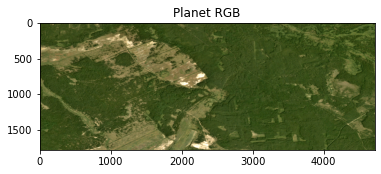

In [145]:
data_RGB_v1 = np.dstack((B1, B2, B3)) / 5   # array dtype=int16
data_RGB_v2_int16 = data_RGB_v1.astype(np.int16)

fig, ax = plt.subplots()
ax.imshow(data_RGB_v2_int16)
ax.set_title('Planet RGB')


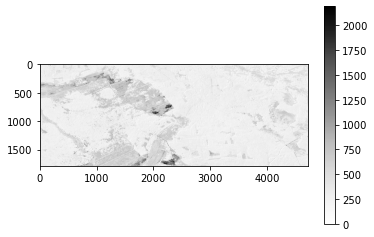

In [146]:
plt.imshow(B1, cmap=plt.cm.Greys)
plt.colorbar()

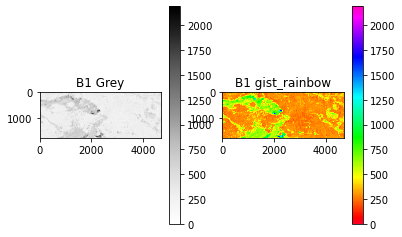

In [147]:
plt.subplot(121).set_title('B1 Grey')
plt.imshow(B1, cmap=plt.cm.Greys)
plt.colorbar()

plt.subplot(122).set_title('B1 gist_rainbow')
plt.imshow(B1, cmap='gist_rainbow')
plt.colorbar()

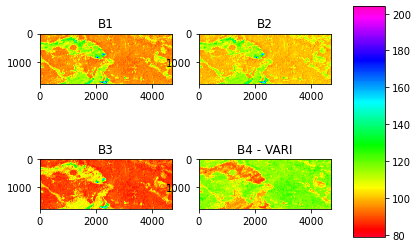

In [148]:
plt.subplot(221).set_title('B1')
plt.imshow(B1, cmap='gist_rainbow' )

plt.subplot(222).set_title('B2')
plt.imshow(B2, cmap='gist_rainbow' )

plt.subplot(223).set_title('B3')
plt.imshow(B3, cmap='gist_rainbow' )

plt.subplot(224).set_title('B4 - VARI')
plt.imshow(B4, cmap='gist_rainbow' )

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [149]:
# create an empty array, each column of the empty array will hold one band of data from the image
# loop through each band in the image nad add to the data array
data = np.empty((naip_ds.RasterXSize*naip_ds.RasterYSize, nbands))
for i in range(1, nbands+1):
    band = naip_ds.GetRasterBand(i).ReadAsArray()
    data[:, i-1] = band.flatten()

In [150]:
# set up the kmeans classification, fit, and predict
km = KMeans(n_clusters=8)
km.fit(data)
km.predict(data)

array([0, 0, 7, ..., 0, 7, 7])

In [151]:
# format the predicted classes to the shape of the original image
out_dat = km.labels_.reshape((naip_ds.RasterYSize, naip_ds.RasterXSize))

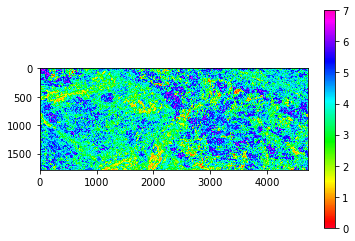

In [152]:
# plt.imshow(km.GetRasterBand(1).ReadAsArray(), cmap='gist_rainbow' )
plt.imshow(out_dat, cmap='gist_rainbow' )

plt.colorbar()

In [153]:
# save the original image with gdal
clfds = driverTiff.Create('D:/MAPS/WD/Seliverstov_Oleg/Planet_aroforest_classification/Chernihiv/Python/Unsupervised/classified_class_8.tif', naip_ds.RasterXSize, naip_ds.RasterYSize, 1, gdal.GDT_Float32)
clfds.SetGeoTransform(naip_ds.GetGeoTransform())
clfds.SetProjection(naip_ds.GetProjection())
clfds.GetRasterBand(1).SetNoDataValue(-9999.0)
clfds.GetRasterBand(1).WriteArray(out_dat)
clfds = None